In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\MISc\data\Medical_insurancebyHarshit16oct.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
790,39,female,41.800,0,no,southeast,5662.22500
252,54,male,34.210,2,yes,southeast,44260.74990
730,35,male,24.420,3,yes,southeast,19361.99880
1876,19,female,32.900,0,no,southwest,1748.77400
2271,32,male,28.930,1,yes,southeast,19719.69470
2679,46,male,25.745,3,no,northwest,9301.89355
1963,31,female,38.095,1,yes,northeast,58571.07448
2327,50,female,46.090,1,no,southeast,9549.56510
2349,46,male,24.795,3,no,northeast,9500.57305
1822,22,male,31.730,0,no,northeast,2254.79670


In [5]:
df.shape

(2772, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [11]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='charges'>

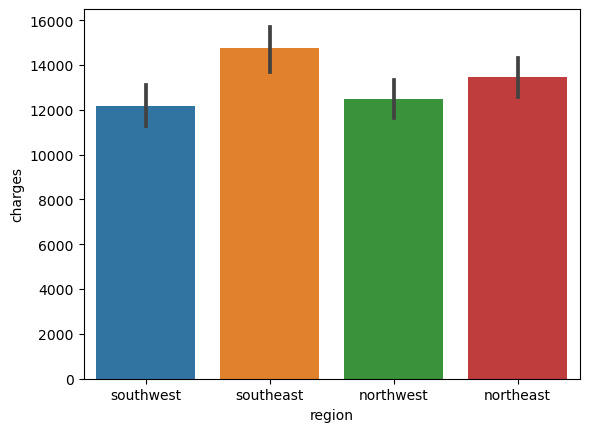

In [14]:
sns.barplot(data = df, x = 'region', y = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

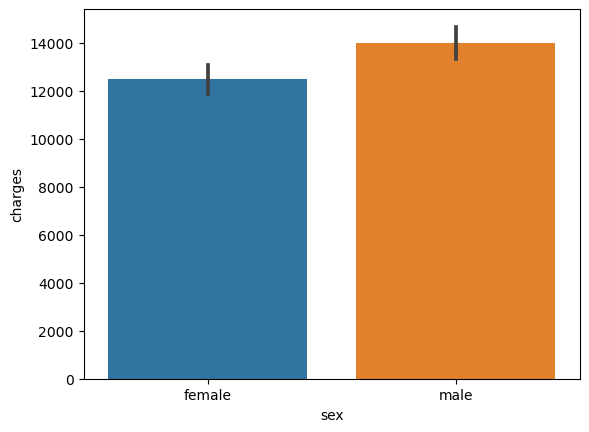

In [15]:
sns.barplot(data = df, x = 'sex', y = 'charges')

<Axes: xlabel='smoker', ylabel='charges'>

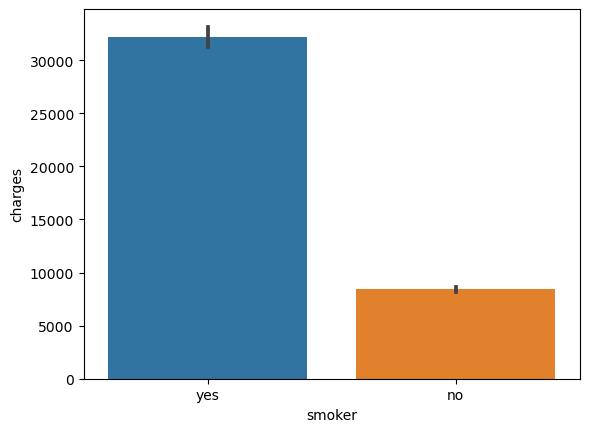

In [16]:
sns.barplot(data = df, y = 'charges', x = 'smoker')

<Axes: xlabel='children', ylabel='charges'>

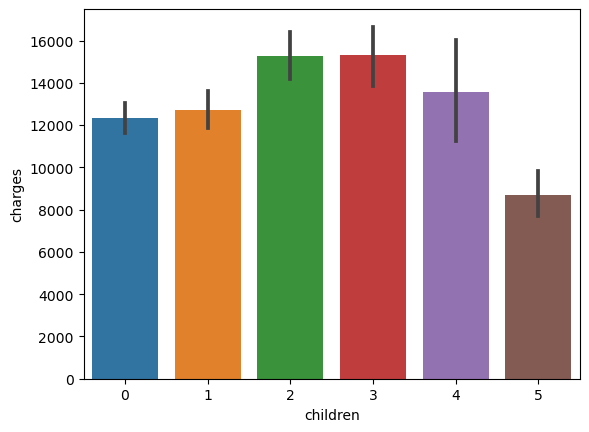

In [17]:
sns.barplot(data = df, y = 'charges', x = 'children')

<Axes: xlabel='children', ylabel='charges'>

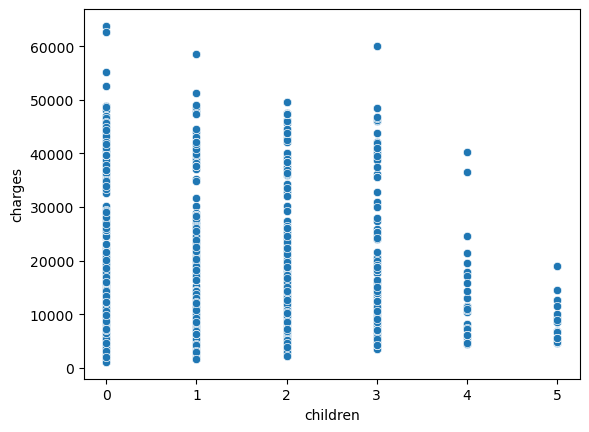

In [18]:
sns.scatterplot(data = df, x = 'children', y = 'charges')

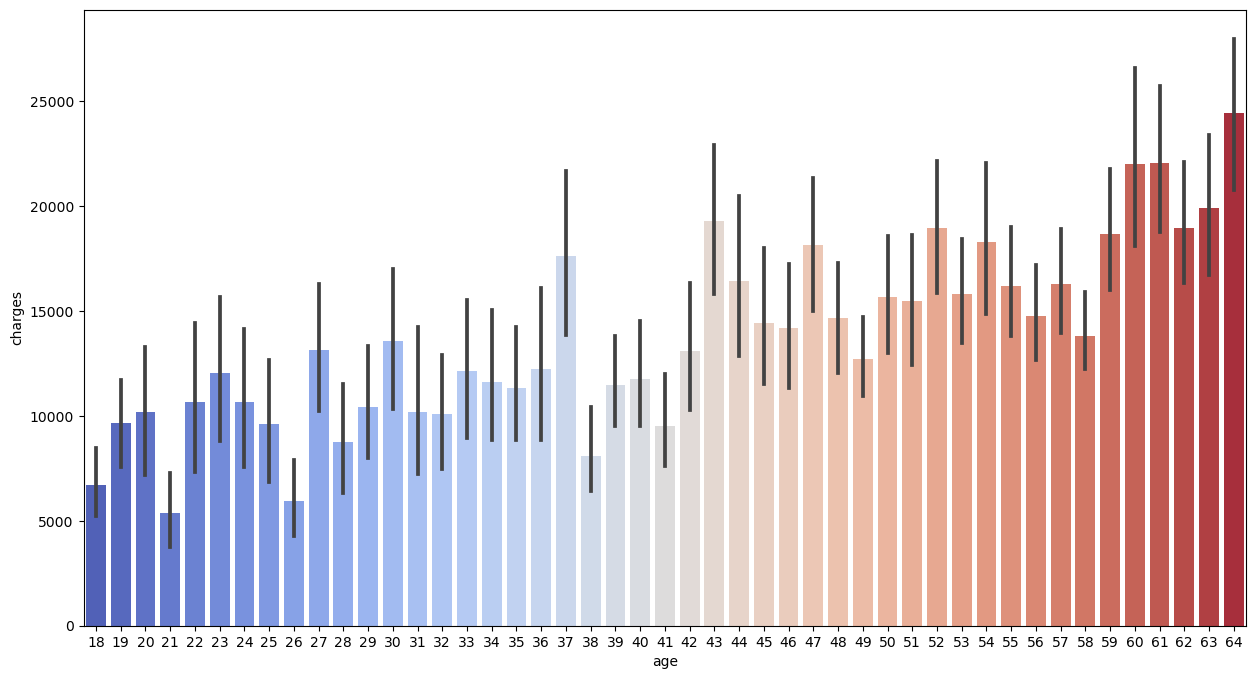

In [19]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df, x = 'age', y = 'charges', palette = 'coolwarm')
plt.show()

In [20]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40','41-50', '51-60', '60+']

df['age_group'] = pd.cut(df['age'], bins = age_bins, labels= age_labels, right = False)

In [21]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,age_group
1454,40,female,36.190,0,no,southeast,5920.10410,41-50
2696,42,male,26.315,1,no,northwest,6940.90985,41-50
1935,43,female,46.200,0,yes,southeast,45863.20500,41-50
2374,34,male,34.675,0,no,northeast,4518.82625,31-40
709,36,female,27.740,0,no,northeast,5469.00660,31-40
417,36,female,22.600,2,yes,southwest,18608.26200,31-40
405,52,female,38.380,2,no,northeast,11396.90020,51-60
811,33,female,42.940,3,no,northwest,6360.99360,31-40
2050,64,female,22.990,0,yes,southeast,27037.91410,60+
1403,23,male,23.845,0,no,northeast,2395.17155,21-30


<Axes: xlabel='age_group', ylabel='charges'>

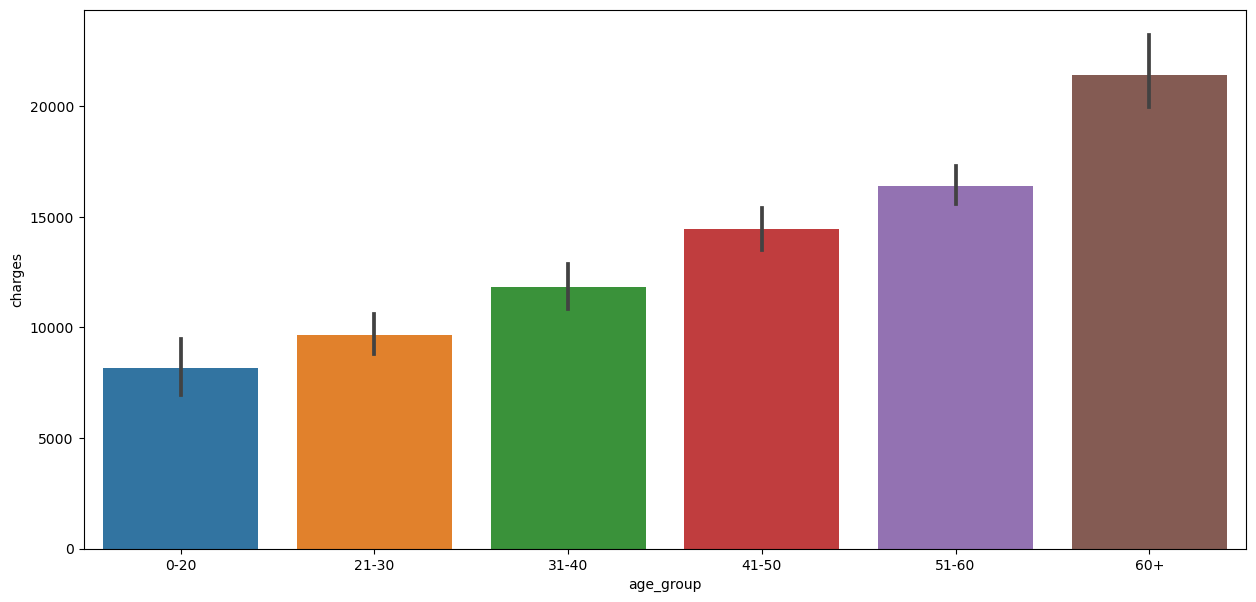

In [22]:
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'age_group', y = 'charges')

In [23]:
bmi_bins = [0, 18.5, 25, 30, 35, 40, 50]
bmi_labels = ['Underweight', 'Normal', 'Overweight','Obese Class I', 'Obese Class II', 'Obese Class III']

df['bmi_group'] = pd.cut(df['bmi'], bins = bmi_bins, labels= bmi_labels, right = False)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-20,Obese Class I
2,28,male,33.000,3,no,southeast,4449.46200,21-30,Obese Class I
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight


<Axes: xlabel='bmi_group', ylabel='charges'>

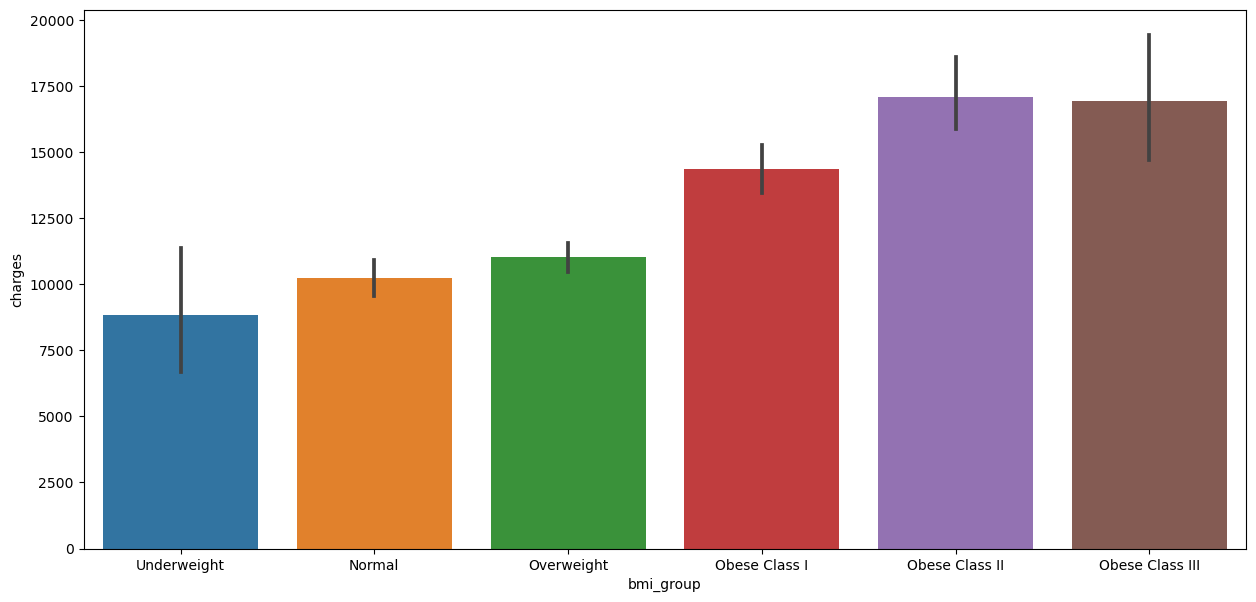

In [25]:
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'bmi_group', y = 'charges')

<Axes: xlabel='bmi_group', ylabel='count'>

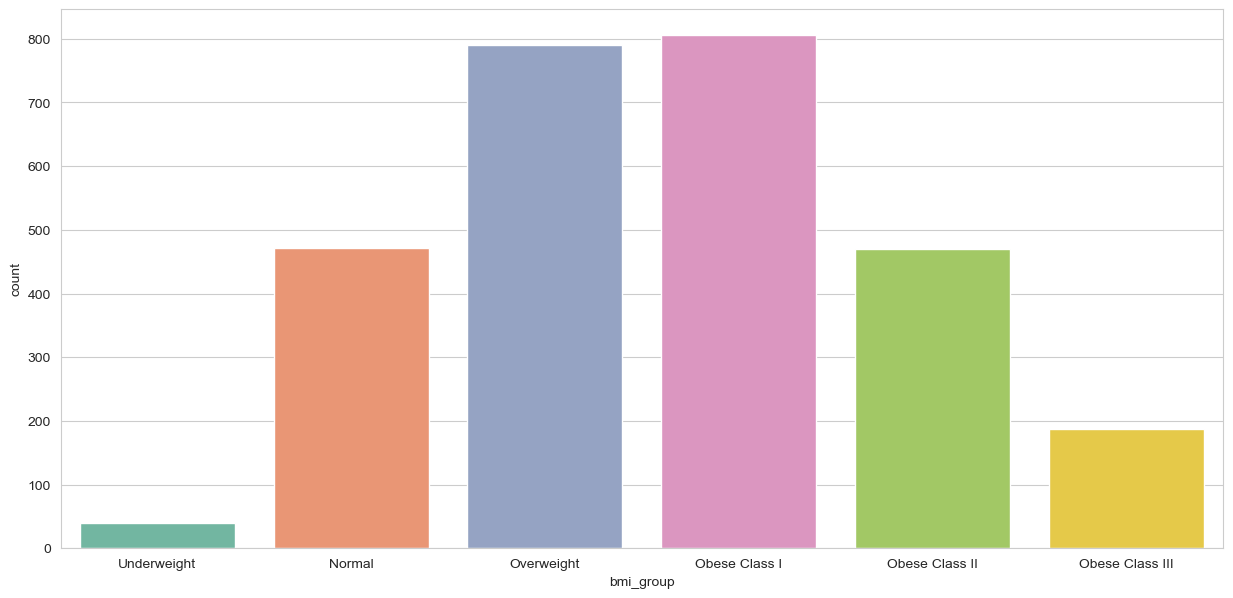

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize = (15, 7))
sns.countplot(data = df, x = 'bmi_group', palette = 'Set2')

In [27]:
corr = df.corr(numeric_only = True)
corr

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


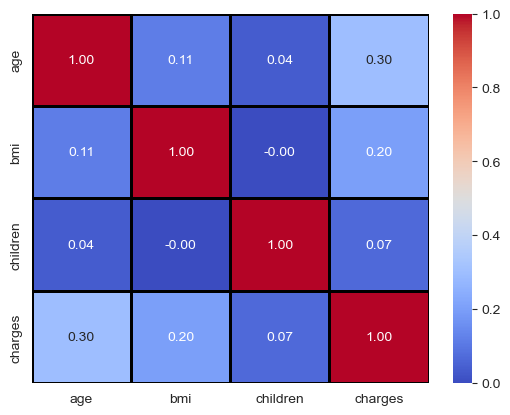

In [28]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm', linecolor = 'black', linewidths = 1, fmt = '.2f')
plt.show()

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-20,Obese Class I
2,28,male,33.000,3,no,southeast,4449.46200,21-30,Obese Class I
3,33,male,22.705,0,no,northwest,21984.47061,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31-40,Overweight


In [30]:
df.drop(columns = ['region'], inplace = True)

In [31]:
df = df.iloc[:, 0:7]

In [32]:
df.head()

,age,sex,bmi,children,smoker,charges,age_group
0,19,female,27.900,0,yes,16884.92400,0-20
1,18,male,33.770,1,no,1725.55230,0-20
2,28,male,33.000,3,no,4449.46200,21-30
3,33,male,22.705,0,no,21984.47061,31-40
4,32,male,28.880,0,no,3866.85520,31-40


In [33]:
df['smoker'] = df['smoker'].replace({'yes':1, 'no':0})
df['sex'] = df['sex'].replace({'male':1, 'female': 0})

In [34]:
df.sample(10)

,age,sex,bmi,children,smoker,charges,age_group
969,39,0,34.32,5,0,8596.82780,31-40
1708,34,1,30.80,0,1,35491.64000,31-40
1428,41,1,21.78,1,0,6272.47720,41-50
1139,19,0,32.49,0,1,36898.73308,0-20
1846,49,0,36.63,3,0,10381.47870,41-50
2196,46,0,30.80,3,0,9414.92000,41-50
1111,38,1,38.39,3,1,41949.24410,31-40
2080,27,0,34.80,1,0,3577.99900,21-30
1344,56,1,40.30,0,0,10602.38500,51-60
1757,57,0,22.23,0,0,12029.28670,51-60


In [35]:
X = df.drop(columns = ['charges', 'children', 'sex', 'age_group'])
y = df['charges']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
df = pd.merge(x_test, y_test, how = 'inner', left_index = True, right_index = True)

In [38]:
df.head()

,age,bmi,smoker,charges
1106,49,29.925,0,8988.15875
1321,62,26.695,1,28101.33305
2313,57,20.100,0,12032.32600
2274,22,39.500,0,1682.59700
1432,18,38.665,0,3393.35635


In [39]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = xgb.predict(x_test)

In [41]:
y_pred

array([ 8509.256 , 28046.326 , 12036.563 ,  1874.779 ,  4453.6475,
       23525.684 ,  7369.894 , 47259.21  , 14074.491 ,  3296.9348,
       13246.339 , 11295.16  ,  3613.1814, 15552.685 ,  4280.5938,
        5066.607 , 23025.34  , 10079.357 ,  4143.444 ,  6589.7563,
       11577.548 , 58049.676 , 19361.043 , 49057.188 , 34326.777 ,
        9240.834 ,  1620.7955, 14297.367 , 17888.508 ,  2279.8916,
       10632.344 ,  3861.7112,  6589.7563, 16185.643 , 25580.867 ,
       10228.105 ,  2201.473 ,  7049.5425,  6600.4146, 20964.312 ,
        4118.281 ,  6600.4146,  8684.804 ,  3339.351 ,  1883.5398,
       50094.984 ,  4186.846 , 44715.586 ,  3512.7869,  5960.12  ,
       43481.902 ,  9636.511 ,  2345.371 ,  4569.035 ,  3426.805 ,
       12115.132 ,  4699.6255,  2032.3053,  5930.12  ,  8591.347 ,
       14895.741 , 11295.466 , 19236.299 ,  1129.0419, 10704.139 ,
       10944.872 ,  3999.403 ,  3558.9602,  6882.182 ,  7369.894 ,
        7861.228 ,  7838.0815,  6853.4507, 14633.417 , 12827.9

In [42]:
df['Prediction'] = xgb.predict(x_test)

In [43]:
df.head()

,age,bmi,smoker,charges,Prediction
1106,49,29.925,0,8988.15875,8509.255859
1321,62,26.695,1,28101.33305,28046.326172
2313,57,20.100,0,12032.32600,12036.563477
2274,22,39.500,0,1682.59700,1874.779053
1432,18,38.665,0,3393.35635,4453.647461


In [44]:
print(r2_score(y_test, y_pred))

0.9383147814199693


In [45]:
mae = mean_absolute_error(y_test, y_pred)
print('Average absolute error: ', '${:.2f}'.format(mae))

Average absolute error:  $1512.58


In [46]:
param_grids = {
    'n_estimators': [100,300,500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,5,7,9]
}

In [47]:
Grid = GridSearchCV(xgb, param_grids, cv = 10, scoring = 'neg_mean_squared_error')

In [48]:
Grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [53]:
best_params = Grid.best_params_
best_score = np.abs(Grid.best_score_)

In [54]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


In [55]:
print(best_score)

10714292.095521528


In [56]:
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 500, max_depth = 7)
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_test)
print(y_pred1)

[ 8904.544  28123.31   12042.635   1986.6166  3594.5815 24107.072
 10292.294  47290.51   16487.889   3010.3406 13333.833  10933.463
  3363.6018 19053.592   4251.1875  5631.0874 27748.498   9651.088
  3953.7205  7067.2393 11233.039  58265.36   19580.12   48839.98
 33697.812   8973.05    1601.2126 14198.777  24015.145   1325.6573
 10615.251   4395.4673  7067.2393 17827.924  27831.879   9440.737
  1735.8159  8684.217   7039.438  20707.521   4432.635   7039.438
  9183.721   3541.944   1812.5647 48679.43    4131.3896 43402.535
  4092.0696  6127.084  43831.41    9412.264   2559.2156  4721.891
  3796.039  12125.829   4124.768   2037.0409  6053.387   8555.208
 17367.389  15303.998  23756.436   2573.515  10803.259  11004.413
  3922.6858  3739.6318  6564.349  10292.294   7425.34    8109.283
  9068.752  14285.185  11250.175   9313.215   1757.3983  7584.7983
  3729.7612 11548.296  21857.844   2850.2395 32034.502   7794.9453
  2573.515  39220.445   3225.283  11146.529  49568.984   1386.3287
 35653.

In [57]:
df['Prediction-Optimized'] = xgb.predict(x_test)
df.sample(10)

,age,bmi,smoker,charges,Prediction,Prediction-Optimized
605,51,34.100,0,9283.56200,9381.274414,9061.416992
572,30,43.120,0,4753.63680,4569.035156,4721.891113
1177,40,27.400,0,6496.88600,7833.800293,6290.783691
210,20,33.000,0,1980.07000,2432.143066,2054.223877
1623,31,38.390,0,4463.20510,10200.367188,7905.275391
1102,29,38.940,0,3471.40960,4529.682617,3637.118652
282,30,27.645,0,4237.12655,4186.846191,4131.389648
2020,51,39.700,0,9391.34600,9338.489258,9323.010742
1776,48,35.625,0,10736.87075,11477.503906,10799.946289
1954,49,31.900,0,11552.90400,13246.338867,13333.833008


In [58]:
print(r2_score(y_test, y_pred1))
mae1 = mean_absolute_error(y_test, y_pred1)
print('Average absolute error: ', '${:.2f}'.format(mae1))

0.9431833554914653
Average absolute error:  $1089.70


In [ ]:
xgb.predict(pd.DataFrame([[25, 24, 0]], columns = ['age', 'bmi', 'smoker']))

In [ ]:
xgb.predict(pd.DataFrame([[55, 34.7, 1]], columns = ['age', 'bmi', 'smoker']))

In [59]:
pickle.dump(xgb, open('xgb.pkl', 'wb'))

In [ ]:
Alternative code for above
import pickle
with open('xgb.pkl','wb') as file:
  pickle.dump(xgb, file)"""